In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [15]:
# Load the cleaned dataset
df = pd.read_csv('/Users/bhavithakula/Documents/practicum/python/cleaned_customer_shopping_data.csv')

In [16]:
# Prepare data for Ridge Regression
X = df[['age', 'quantity', 'price']]
y = df['quantity'] * df['price']  # Target: Total Spending

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

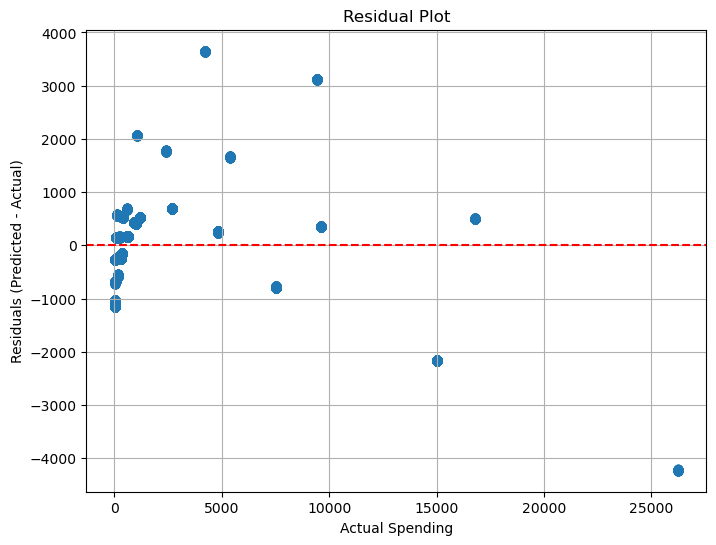

In [19]:
# Visualization 1: Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred - y_test, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Spending')
plt.ylabel('Residuals (Predicted - Actual)')
plt.grid(True)
plt.show()

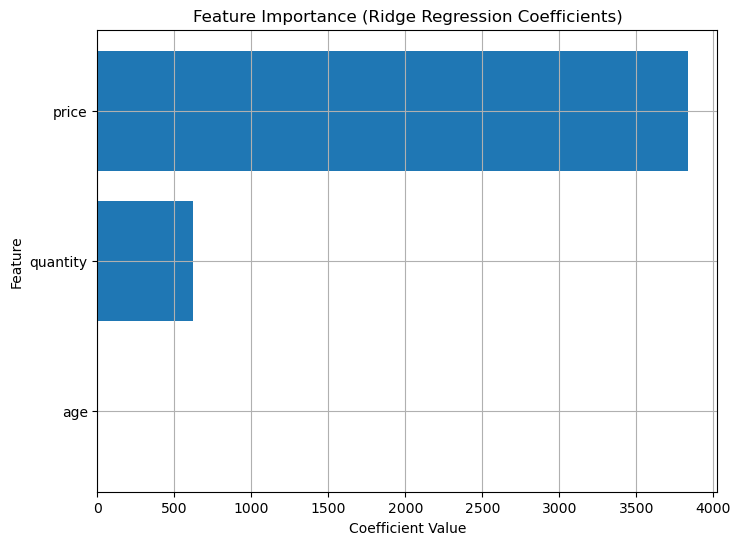

In [20]:
# Visualization 2: Feature Importance (Coefficient Bar Chart)
coef = ridge.coef_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, coef)
plt.title('Feature Importance (Ridge Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

In [21]:
# Prepare RFM data for clustering
# Create Recency, Frequency, Monetary
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
latest_date = df['invoice_date'].max()
rfm = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (latest_date - x.max()).days,
    'customer_id': 'count',
    'price': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [22]:
# Normalize RFM values
scaler_rfm = StandardScaler()
rfm_scaled = scaler_rfm.fit_transform(rfm)

Missing values BEFORE KMeans: 59428
Missing values AFTER Imputation: 0


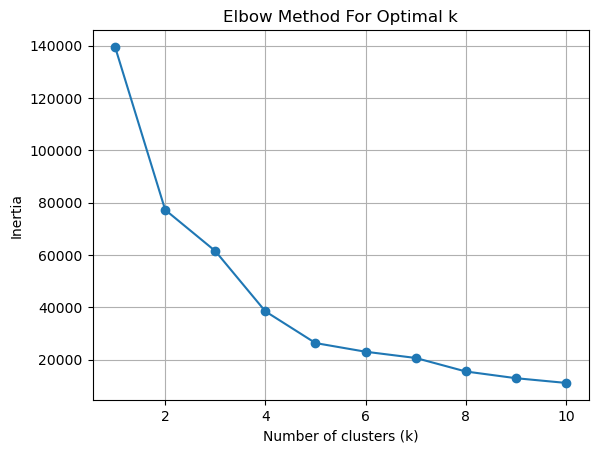

In [23]:
import numpy as np

# For arrays: check missing values like this
print("Missing values BEFORE KMeans:", np.isnan(rfm_scaled).sum())

# Step 2: If missing values exist, fix them
if np.isnan(rfm_scaled).sum() > 0:
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    rfm_scaled = imputer.fit_transform(rfm_scaled)
    print("Missing values AFTER Imputation:", np.isnan(rfm_scaled).sum())

# Step 3: Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Step 4: Plot Elbow Curve
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


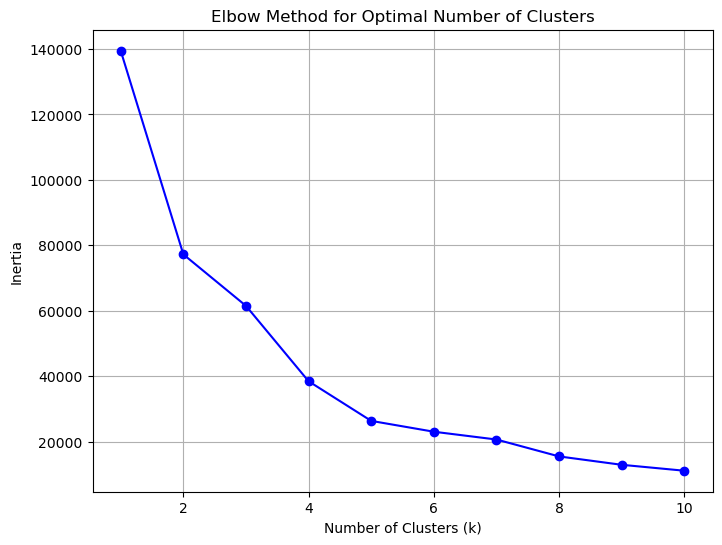

In [24]:
# Visualization 3: Elbow Method Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()